# Introduction: A data long-strategy based on price & volume data

We are going to analyse data from the pair **BTCUSDT** that we have extracted through the package *yfinance*, which allows us to connect ourselves to Yahoo Finance.

This Notebook has the purpose of seeing the volatility of the pair the will be working with and how it has evolved during the last years.
- We appreciate that we do not need to modify the operability time periods, as cryptocurrencies are operating also during the weekends.
- We observe tat when biggest changes in price happen it is due to a big volume that is moving the asset.
- We add the *"return"* column in order to know the posible profits if we were operating everyday, and when this changes become more relevant.
- Lastly, we make a hierarchy of the returns to know the highest and the lowest.

This will provide us a first approach to the task, which will be making a strategy based on volume and price.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
symbol = "BTC-USD"
start = "2019-01-14"
end = "2024-06-06"

data = pd.read_csv("bitcoin.csv", index_col = "Date", parse_dates=["Date"])
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


In [5]:
data.info() # No null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   36168 non-null  float64
 1   Volume  36168 non-null  float64
dtypes: float64(2)
memory usage: 847.7 KB


## Financial Data Analysis / Visual Inspection

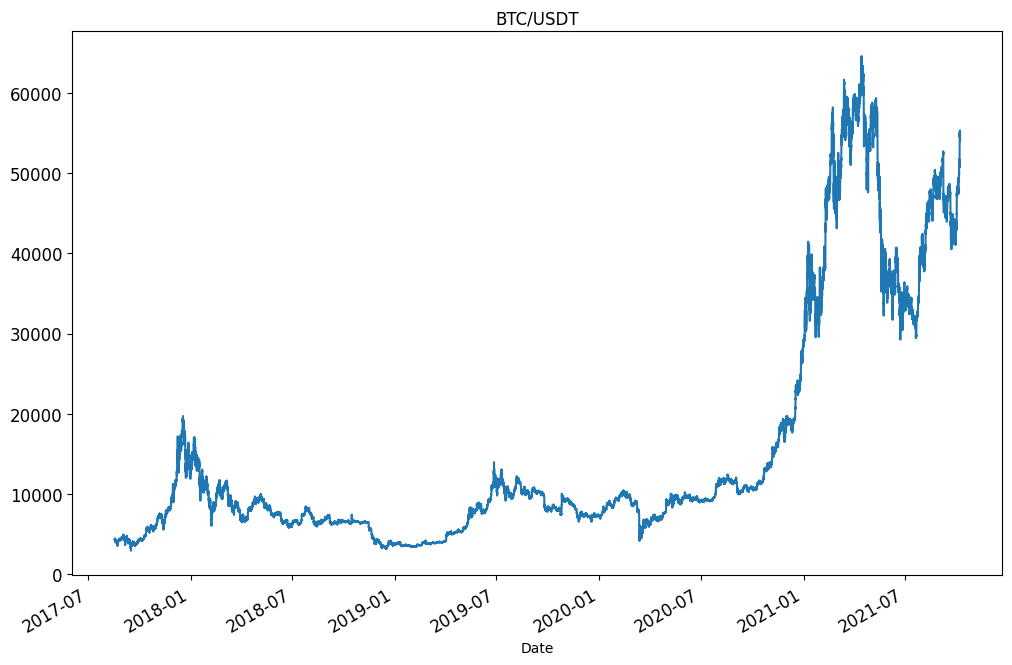

In [11]:
data["Close"].plot(figsize=(12,8),title = "BTC/USDT",fontsize=12)
plt.show()

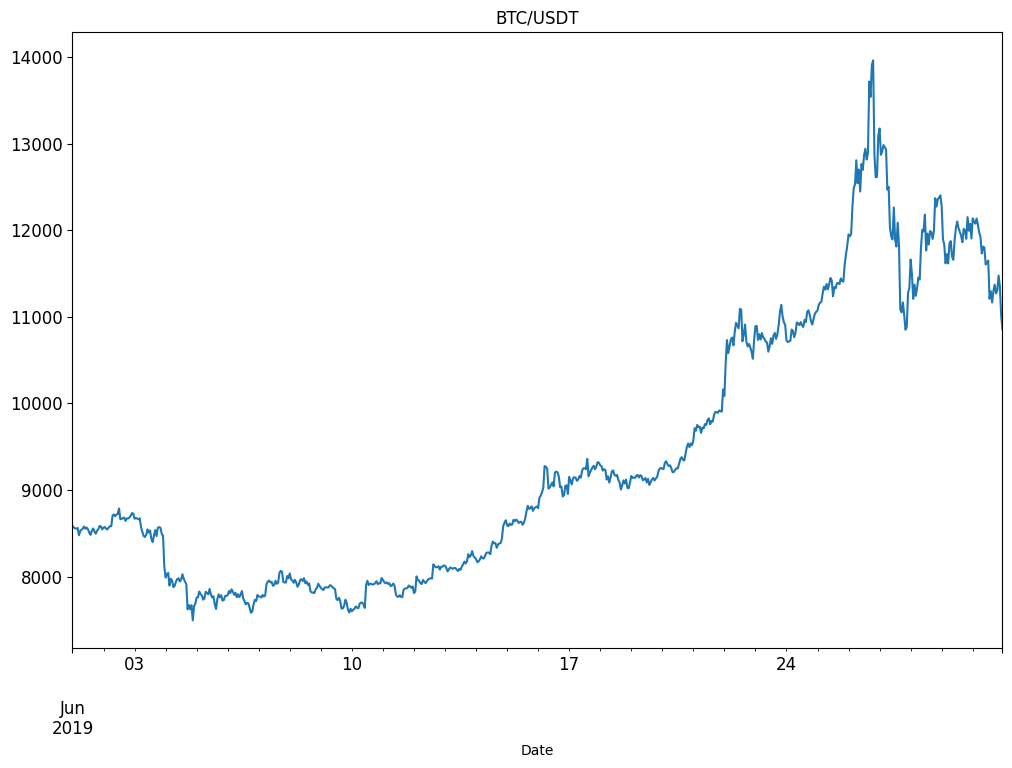

In [12]:
# Visualization for one month

data["Close"].loc["2019-06"].plot(figsize=(12,8),title = "BTC/USDT",fontsize=12)
plt.show()

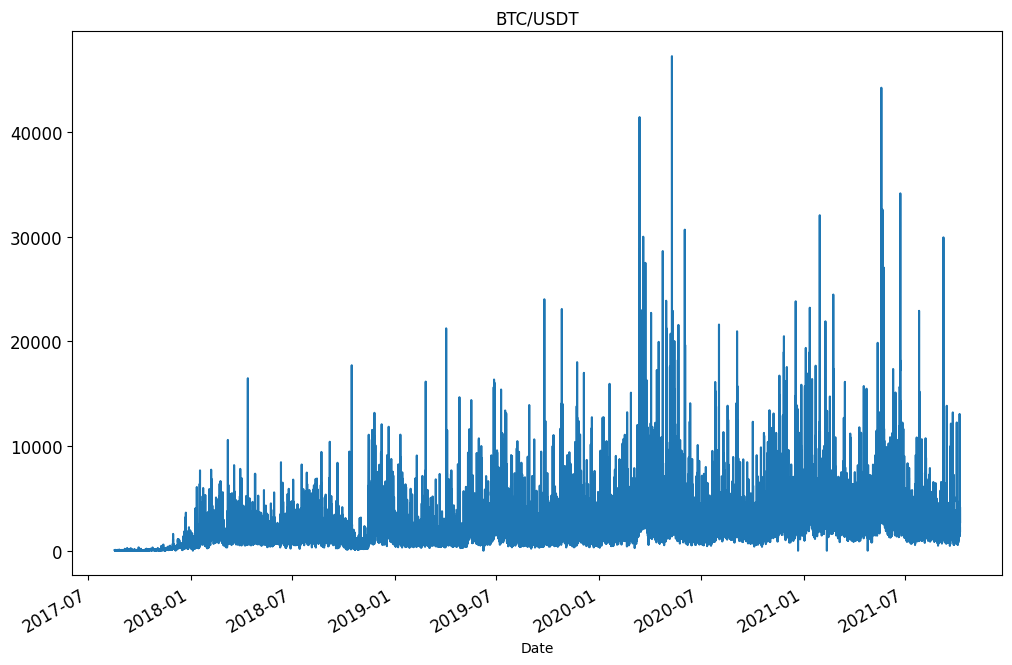

In [13]:
data["Volume"].plot(figsize=(12,8),title = "BTC/USDT",fontsize=12)
plt.show()

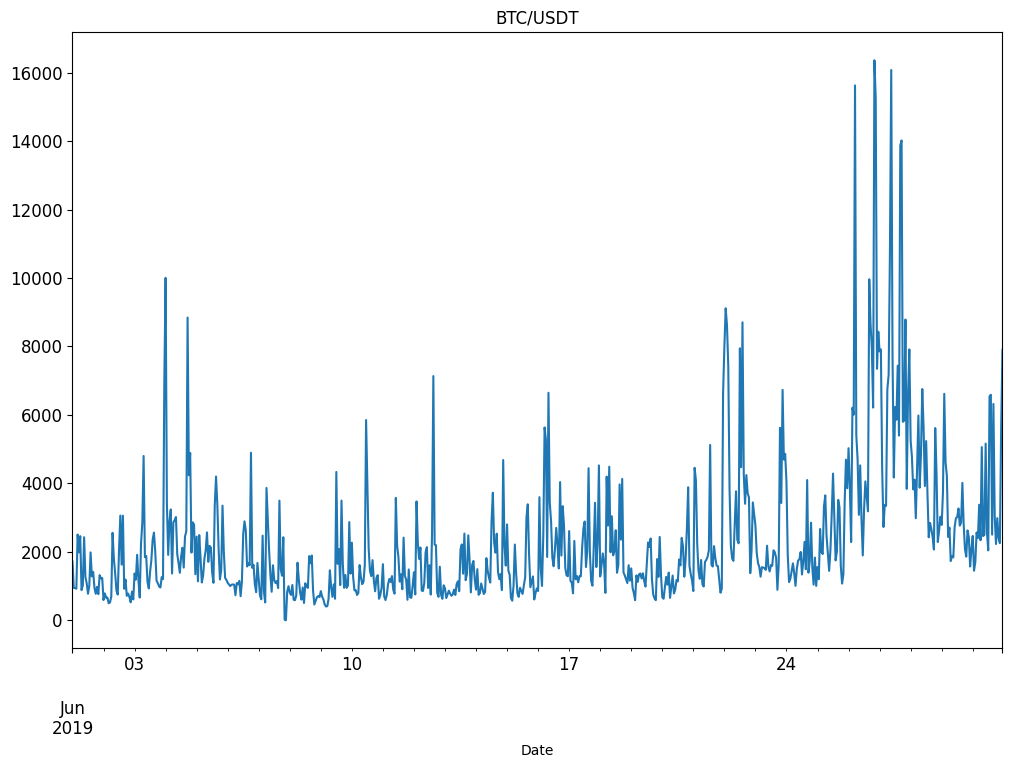

In [15]:
data["Volume"].loc["2019-06"].plot(figsize=(12,8),title = "BTC/USDT",fontsize=12)
plt.show()

In [16]:
data["returns"] = np.log(data["Close"].div(data["Close"].shift(1)))

In [17]:
data.describe()

,Close,Volume,returns
count,36168.000000,36168.000000,36167.000000
mean,15211.287479,2121.344201,0.000070
std,14918.059912,2211.660869,0.009669
min,2919.000000,0.000000,-0.201033
25%,6619.987500,910.157520,-0.002955
50%,9110.620000,1551.676864,0.000139
75%,13411.242500,2603.584828,0.003258
max,64577.260000,47255.762685,0.160280


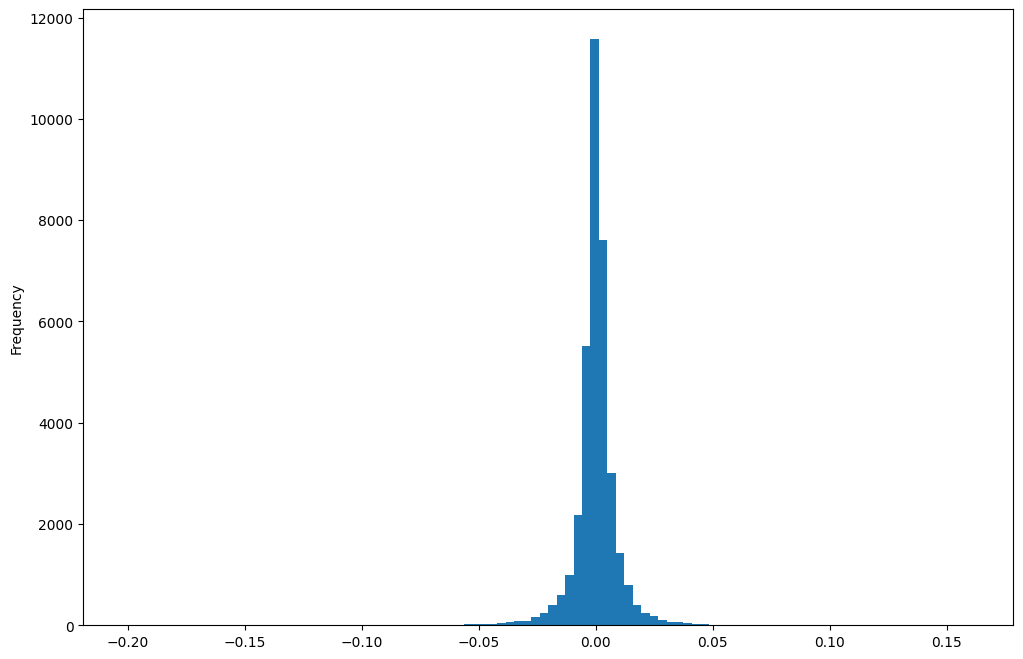

In [18]:
data["returns"].plot(kind="hist",bins=100,figsize=(12,8))
plt.show()

In [19]:
data["returns"].nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [20]:
data["returns"].nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64